In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
def plot_for_every_column(model, columns):
    for c in columns:
        #fig = plt.figure(figsize=(12,8))
        #fig = sm.graphics.plot_regress_exog(model, c, fig=fig)
        fig = sm.graphics.plot_ccpr(model, c)
        fig.tight_layout(pad=1.0)
        
def plot_ccpr(model, cols):
    plotn = 0
    rows = 4
    columns = 4
    fig, ax_array = plt.subplots(rows, columns,squeeze=False)
    fig.set_figheight(20)
    fig.set_figwidth(25)
    for i,ax_row in enumerate(ax_array):
        for j,axes in enumerate(ax_row):
            axes.set_title(cols[plotn])
            sm.graphics.plot_ccpr(model, cols[plotn], ax = axes)
            plotn = plotn + 1
    plt.show()
    
def plot_model(df, model):
    influence = model.get_influence()

    df['resid'] = model.resid
    df['fittedvalues'] = model.fittedvalues
    df['resid_std'] = model.resid_pearson
    df['leverage'] = influence.hat_matrix_diag

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
    plt.style.use('seaborn')

    # Residual against fitted values.
    df.plot.scatter(
        x='fittedvalues', y='resid', ax=axes[0, 0]
    )
    axes[0, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')

    # qqplot
    sm.qqplot(
        df['resid'], dist=stats.t, fit=True, line='45',
        ax=axes[0, 1], c='#4C72B0'
    )
    axes[0, 1].set_title('Normal Q-Q')

    # The scale-location plot.
    df.plot.scatter(
        x='fittedvalues', y='resid_std', ax=axes[1, 0]
    )
    axes[1, 0].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 0].set_title('Scale-Location')

    # Standardized residuals vs. leverage
    df.plot.scatter(
        x='leverage', y='resid_std', ax=axes[1, 1]
    )
    axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
    axes[1, 1].set_xlabel('Leverage')
    axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
    axes[1, 1].set_title('Residuals vs Leverage')

    plt.tight_layout()
    plt.show()

In [2]:
d = pd.read_csv("life.csv")
d = d.interpolate(method = 'zero')
d["gdp_per_capita"] = d["GDP"] / d["Population"]
d.columns=d.columns.str.lower().str.replace(' ','')
d.columns=d.columns.str.lower().str.replace('-','')
d.columns=d.columns.str.lower().str.replace('/','')
d.columns=d.columns.str.lower().str.replace('_','')
d = d[d.year == max(d.year)]
d = d.drop(["country", "year","status", "gdp", "population", "percentageexpenditure"], axis = 1)

f = "lifeexpectancy~" + "+".join(d.columns[1:])

### Not normalised data

In [3]:
model = ols(formula = f, data=d).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     78.10
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.74e-68
Time:                        19:55:53   Log-Likelihood:                -446.40
No. Observations:                 183   AIC:                             926.8
Df Residuals:                     166   BIC:                             981.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       52.0553      2.117     24.592      0.000      47.876      56.235
adultmortality                  -0.0231      0.003     -6.703      0.000      -0.030      -0.016
infantdeaths                     0.0569      0.032      1.770      0.079      -0.007       0.120
alcohol                          0.0088      0.058      0.152      0.880      -0.105       0.123
hepatitisb                      -0.0002      0.018     -0.012      0.991      -0.035       0.035
measles                       7.847e-06   5.54e-05      0.142      0.887      -0.000       0.000
bmi                             -0.0023      0.014     -0.164      0.870      -0.030       0.025
underfivedeaths                 -0.0467      0.023     -2.037      0.043      -0.092      -0.001
polio                            0.0119      0.013      0.938      0.350      -0.013       0.037
totalexpenditure                 0.0149      0.095      0.156      0.876      -0.173       0.202
diphtheria                       0.0295      0.023      1.275      0.204      -0.016       0.075
hivaids                         -0.5430      0.224     -2.420      0.017      -0.986      -0.100
thinness119years                -0.1640      0.243     -0.674      0.501      -0.644       0.316
thinness59years                  0.0451      0.237      0.190      0.849      -0.423       0.513
incomecompositionofresources    26.7372      4.022      6.648      0.000      18.797      34.678
schooling                        0.1665      0.184      0.906      0.366      -0.196       0.529
gdppercapita                    -0.3839      0.436     -0.881      0.380      -1.244       0.477
==============================================================================
Omnibus:                       12.850   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.257
Skew:                          -0.390   Prob(JB):                     3.99e-05
Kurtosis:                       4.431   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

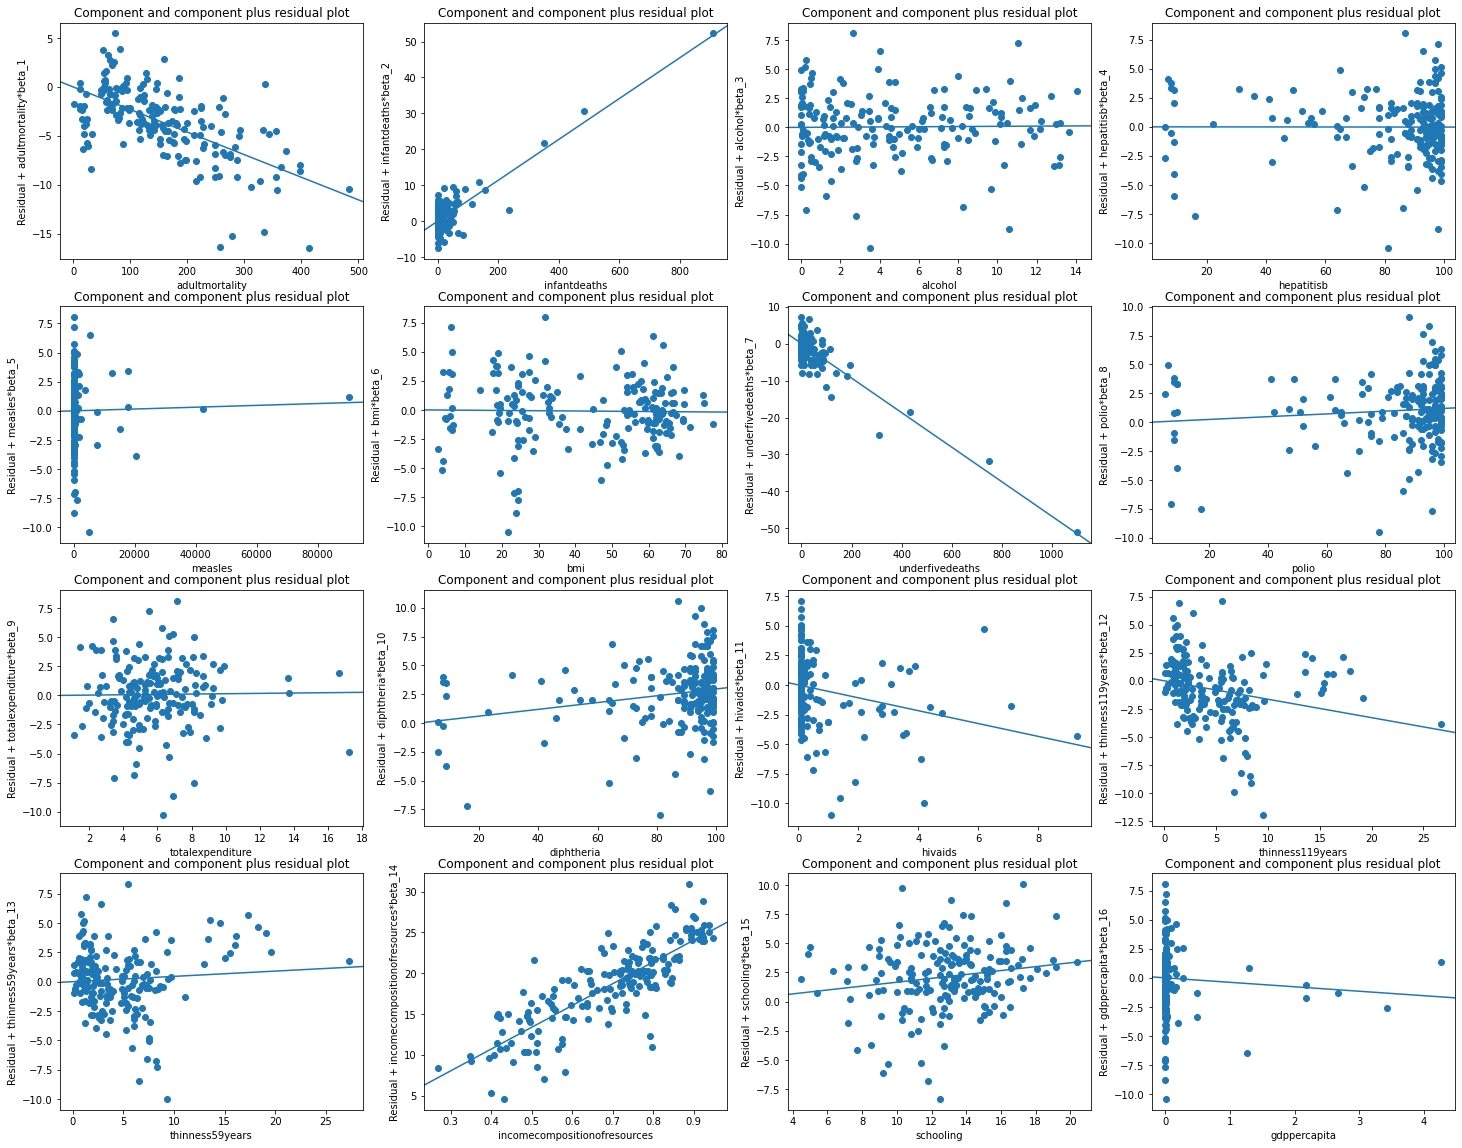

In [4]:
plot_ccpr(model, d.columns[1:])

### Normalised data

In [5]:
l = d.copy()
l.gdppercapita = np.log(l.gdppercapita)
l.infantdeaths = np.log(l.infantdeaths + 1)
l.measles = np.log(l.measles + 1)
l.totalexpenditure = np.log(l.totalexpenditure + 1)
l.underfivedeaths = np.log(l.underfivedeaths + 1)

model = ols(formula = f, data=l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     76.43
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           8.29e-68
Time:                        19:55:55   Log-Likelihood:                -448.14
No. Observations:                 183   AIC:                             930.3
Df Residuals:                     166   BIC:                             984.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       51.9080      2.665     19.478      0.000      46.646      57.170
adultmortality                  -0.0226      0.004     -6.400      0.000      -0.030      -0.016
infantdeaths                     1.6076      1.622      0.991      0.323      -1.595       4.810
alcohol                          0.0119      0.059      0.204      0.839      -0.104       0.128
hepatitisb                    8.206e-05      0.018      0.005      0.996      -0.035       0.035
measles                          0.0131      0.094      0.139      0.890      -0.173       0.199
bmi                             -0.0020      0.014     -0.143      0.886      -0.030       0.026
underfivedeaths                 -1.8496      1.567     -1.181      0.239      -4.943       1.244
polio                            0.0133      0.013      1.029      0.305      -0.012       0.039
totalexpenditure                 0.1661      0.668      0.249      0.804      -1.152       1.484
diphtheria                       0.0273      0.024      1.158      0.249      -0.019       0.074
hivaids                         -0.5831      0.229     -2.542      0.012      -1.036      -0.130
thinness119years                -0.1401      0.246     -0.569      0.570      -0.626       0.346
thinness59years                  0.0499      0.239      0.209      0.835      -0.423       0.522
incomecompositionofresources    26.1835      4.068      6.437      0.000      18.152      34.215
schooling                        0.1629      0.185      0.881      0.380      -0.202       0.528
gdppercapita                    -0.1082      0.081     -1.330      0.185      -0.269       0.052
==============================================================================
Omnibus:                        9.287   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               13.587
Skew:                          -0.291   Prob(JB):                      0.00112
Kurtosis:                       4.201   Cond. No.                     4.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

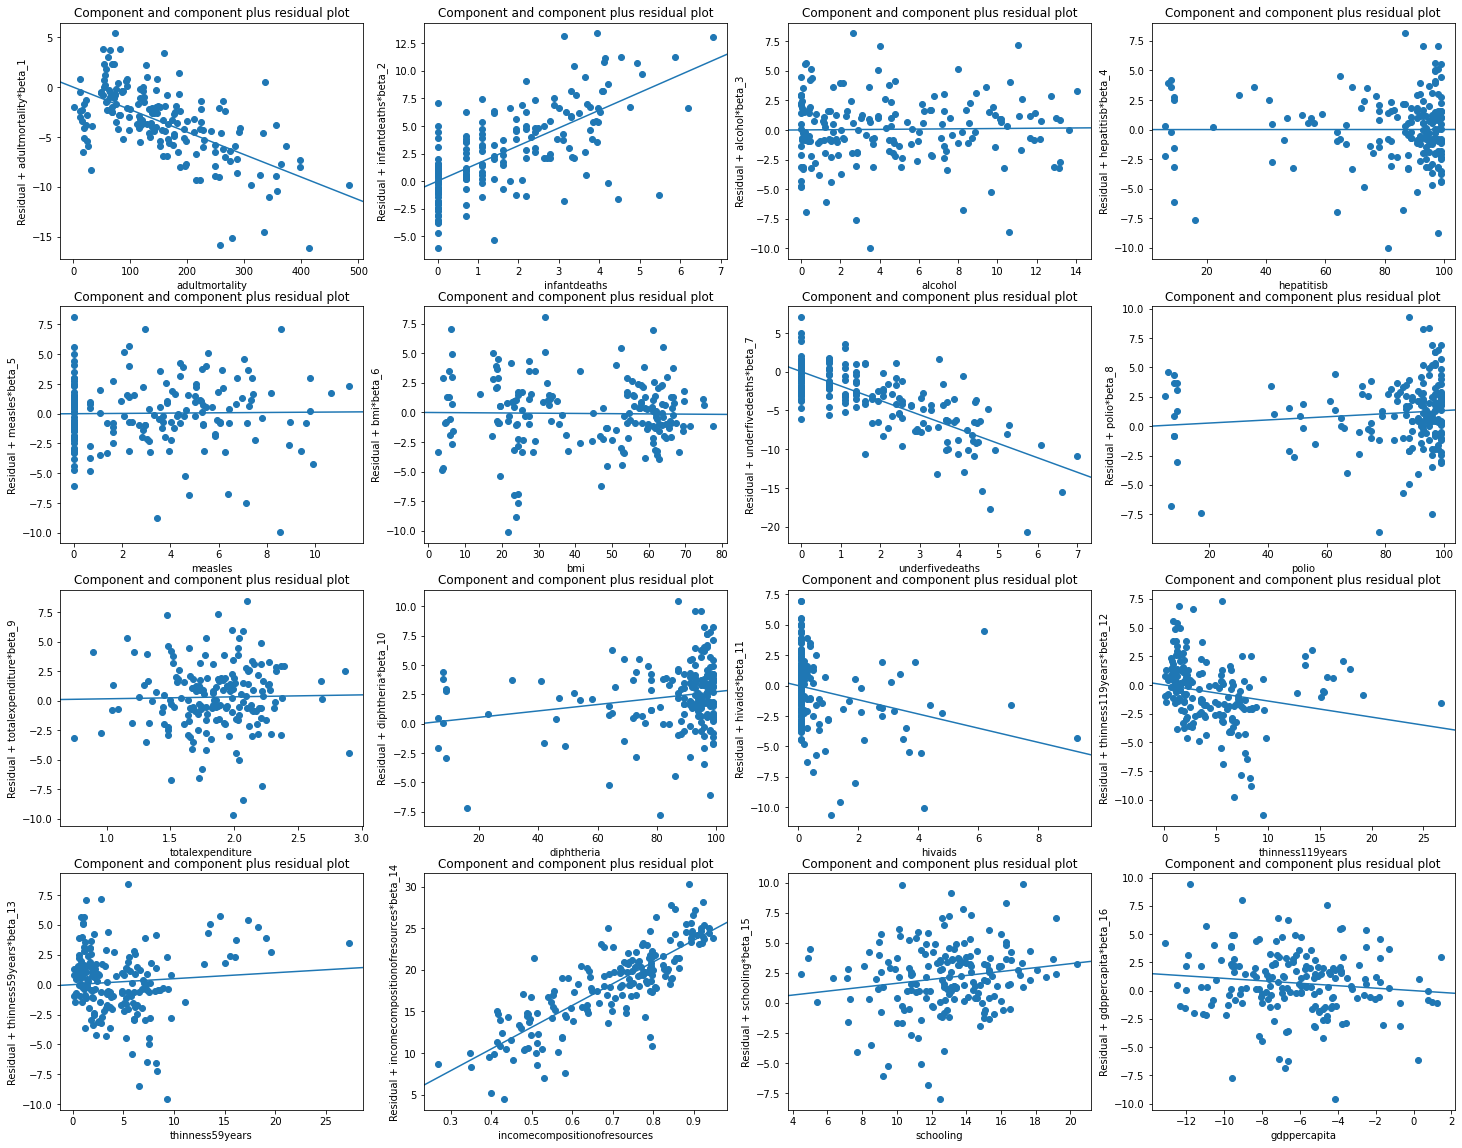

In [6]:
plot_ccpr(model, l.columns[1:])

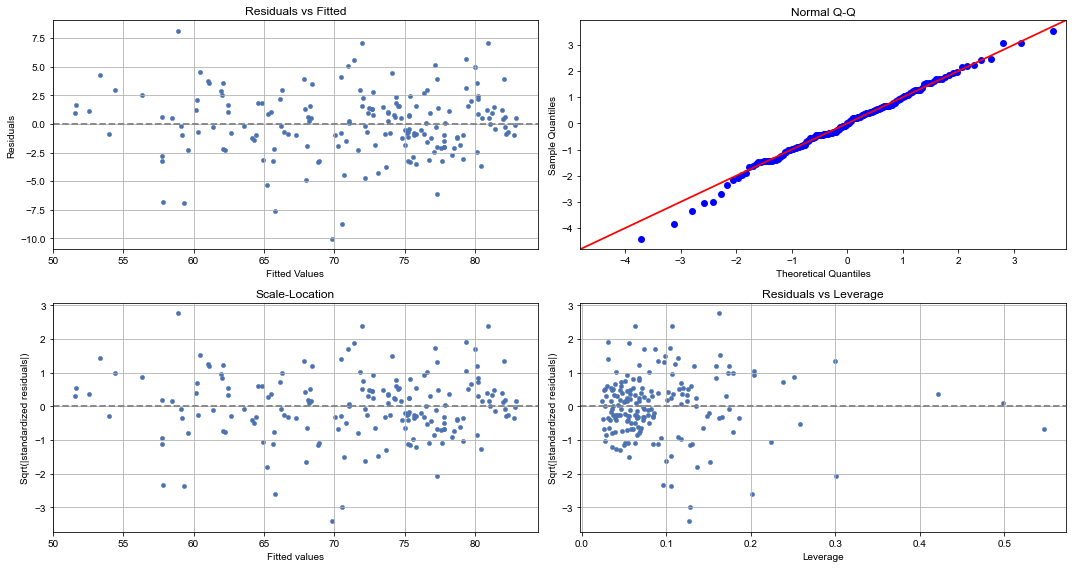

In [7]:
plot_model(l, model)

In [23]:
influence = model.get_influence()
df = influence.summary_frame()
df.columns

Index(['dfb_Intercept', 'dfb_adultmortality', 'dfb_infantdeaths',
       'dfb_alcohol', 'dfb_hepatitisb', 'dfb_measles', 'dfb_bmi',
       'dfb_underfivedeaths', 'dfb_polio', 'dfb_totalexpenditure',
       'dfb_diphtheria', 'dfb_hivaids', 'dfb_thinness119years',
       'dfb_thinness59years', 'dfb_incomecompositionofresources',
       'dfb_schooling', 'dfb_gdppercapita', 'cooks_d', 'standard_resid',
       'hat_diag', 'dffits_internal', 'student_resid', 'dffits'],
      dtype='object')

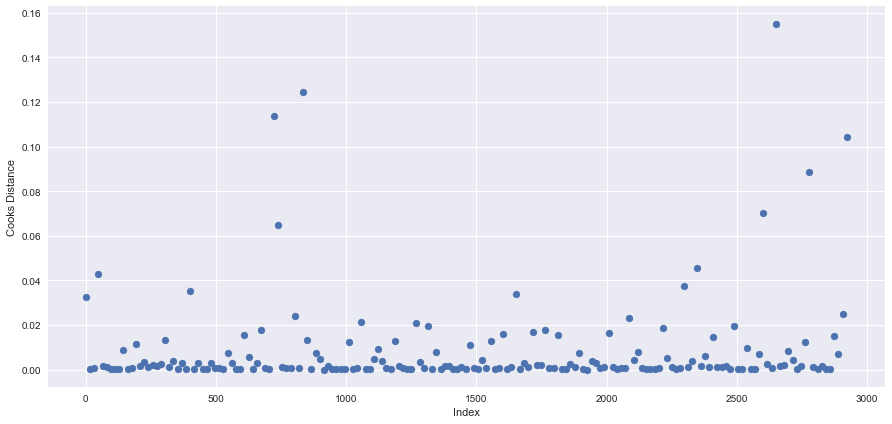

In [25]:
plt.figure(figsize=(15, 7))
plt.scatter(df.index, df.cooks_d)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

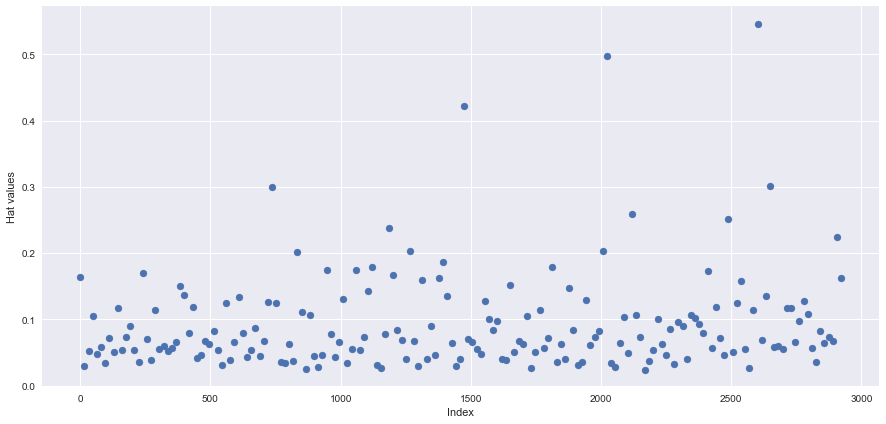

In [27]:
plt.figure(figsize=(15, 7))
plt.scatter(df.index, df.hat_diag)
plt.xlabel('Index')
plt.ylabel('Hat values')
plt.show()

In [29]:
shapiro(model.resid)

ShapiroResult(statistic=0.9822049140930176, pvalue=0.019718153402209282)

In [45]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 29.71506816864176),
 ('p-value', 0.019537018389447873),
 ('f-value', 2.011246823587582),
 ('f p-value', 0.015021203443304109)]

In [44]:
table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame
print(table)

                                   sum_sq     df          F        PR(>F)
adultmortality                 354.229421    1.0  40.961879  1.524555e-09
infantdeaths                     8.493416    1.0   0.982150  3.231111e-01
alcohol                          0.360281    1.0   0.041662  8.385161e-01
hepatitisb                       0.000181    1.0   0.000021  9.963541e-01
measles                          0.167316    1.0   0.019348  8.895423e-01
bmi                              0.177549    1.0   0.020531  8.862374e-01
underfivedeaths                 12.052665    1.0   1.393729  2.394652e-01
polio                            9.165519    1.0   1.059869  3.047427e-01
totalexpenditure                 0.534972    1.0   0.061862  8.038838e-01
diphtheria                      11.597112    1.0   1.341050  2.485122e-01
hivaids                         55.870086    1.0   6.460626  1.194461e-02
thinness119years                 2.804713    1.0   0.324327  5.697884e-01
thinness59years                  0.376